# IMPORT LIBRARIES

In [62]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifierCV,RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, plot_roc_curve,roc_auc_score,roc_curve, precision_recall_curve
from sklearn.metrics import classification_report
from lightgbm import LGBMClassifier
# from sklearn.metrics import roc_curve
# pd.options.plotting.backend  = "plotly"

# LOAD DATASET

In [63]:
trainset = pd.read_csv('data/cleaned_df_train.csv')

In [64]:
trainset

,Unnamed: 0,ID,Customer Subtype,Number of houses,Avg size household,Avg age,Customer main type,Roman catholic,Protestant,Other relition,...,Number of private accident insurance policies,Number of family accidents insurance policies,Number of disability insurance policies,Number of fire policies,Number of surfboard policies,Number of boat policies,Number of bicycle policies,Number of property insurance policies,Number of social security insurance policies,Target
0,0,1,33,1,3,2,8,0,5,1,...,0,0,0,1,0,0,0,0,0,0
1,1,2,37,1,2,2,8,1,4,1,...,0,0,0,1,0,0,0,0,0,0
2,2,3,37,1,2,2,8,0,4,2,...,0,0,0,1,0,0,0,0,0,0
3,3,4,9,1,3,3,3,2,3,2,...,0,0,0,1,0,0,0,0,0,0
4,4,5,40,1,4,2,10,1,4,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5817,5817,5818,36,1,1,2,8,0,6,1,...,0,0,0,1,0,0,0,0,0,0
5818,5818,5819,35,1,4,4,8,1,4,1,...,0,0,0,1,0,0,0,0,0,0
5819,5819,5820,33,1,3,4,8,0,6,0,...,0,0,0,1,0,0,0,0,0,1
5820,5820,5821,34,1,3,2,8,0,7,0,...,0,0,0,0,0,0,0,0,0,0


<p><b style='font-weight=bold; color=darkblue; text-align:justified'>Imbalance data have been a significant problem in the real-world when applying Machine Learning Models to classify groups of customers in many important business activities such as loan default/ Fraud detection, email spam detection, cancer diagnostics, and customer churn prediction...</b></p>

<p><b style='font-weight=bold; color=darkblue; text-align:justified'>These imbalance problems exist because of the nature of this problem. For example, most people request an amount of money from the bank using for their own demands. their demands might be buying a car/phone, renting an apartment, house purchasing, or building a starting up business. Almost no one intends to borrow money to run away (because if it occurs frequently, the bank will never provide the service or they will strictly screen borrowers' portfolios carefully and take many conditions into account when they prepare contracts to prevent default occurring. cancer probability is very small compared to normal conditions (although, it is necessary to consider the probability of cancer in specific problems, such as men have a higher odds of suffering lung cancer compared to women, but according to information on the CDC webpage, at US in all state, the rate of cancer regardless of gender, ethnicities is from 350 per 100.000 to 500 per 100.000). the factors of cancer scarcity are people have generic factors gained from their parents/grandparents and need to be exposed to some habit or environment. Since the uncertainty of bad events (accident when driving cars, `big fire at night, damage by accident or flood during using caravan) happen even when the risk rate is very small, people desire a happy and safety life that cover in insurance products.</b></p>
<p><b style='font-weight=bold; color=darkblue; text-align:justified'>There are many techniques for dealing with prediction error problems from imbalanced datasets. In this project, I survey some resample techniques (SMOTE, UnderSampling, OverSampling) alone or combined with PCA (only for the dataset used in this project for solving the covariate correlation phenomenon). After data preparation (resample alone or with PCA), some models that are considered effective for imbalance issues were built including LinearDiscriminantAnalysis, RandomForestClassifier, LogisticRegression, and LGBMClassifier with each of the data samples prepared. Finally, the moving threshold technique was tuned and considered the threshold range from 0 to 100 to choose the best threshold build from a probability-based algorithm -Logistic Regression.</b></p>

<p><b style='font-weight=bold; color=darkblue; text-align:justified;'>To evaluate model performance; recall, f2_score, auc and the number of True Positive cases were considered the most. It is crucial to calculate the cost of loss from the confusion matrix where the number of false positive and false negative cases was detected. Imagine that if the company wants to cover all positive customers, it can cover all customers. Still, the cost waste from uninsurance (customers who do not buy the product) is large because the majority of customers (94%) are not buying. However, if the company ignores a large number of customers who are the potential to buy the product because of false negative cases detected from our models, the loss is also large. Then, it is difficult but necessary to maximize correct positive cases (minimize false negatives) but not include too many false positive cases from prediction.</b></p>


# SPLIT DATA

In [65]:
# train, validation = train_test_split(trainset, train_size=0.7, shuffle=True)
X_train, X_test, y_train, y_test = train_test_split(trainset.iloc[:,2:-1], trainset.iloc[:,-1], train_size=0.75, shuffle=True)

In [66]:
# X_train, y_train = train[list(train.columns)[2:-1]], train['Target']
# X_test, y_test = validation[list(validation.columns)[2:-1]], train['Target']
selected_feat = ['Customer Subtype', 'Customer main type', 'Protestant',
       'Other relition', 'No religion', 'Married', 'Other relation', 'Singles',
       'Household without children', 'Household with children',
       'High level education', 'Medium level education',
       'Lower level education', 'High status', 'Middle management',
       'Skilled labourers', 'Unskilled labourers', 'Social class A',
       'Social class B1', 'Social class B2', 'Social class C', 'Rented house',
       'Home owners', '1 car', '2 cars', 'No car', 'National Health Service',
       'Private health insurance', 'Income 30.000', 'Income 30-45.000',
       'Income 45-75.000', 'Income 75-122.000', 'Average income',
       'Purchasing power class', 'Contribution private third party insurance',
       'Contribution car policies', 'Contribution fire policies',
       'Number of private third party insurance', 'Number of car policies',
       'Number of fire policies']

# Data with SMOTE
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)
X_res.shape
# Data with UnderSamling and OverSampling
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
us=RandomUnderSampler(random_state=42)
X_us, y_us = us.fit_resample(X_train, y_train)
os=RandomOverSampler(random_state=42)
X_os, y_os = os.fit_resample(X_train, y_train)

In [67]:
# survey PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=25)
X_train_pca = pca.fit_transform(X_res)
X_test_pca = pca.transform(X_test)

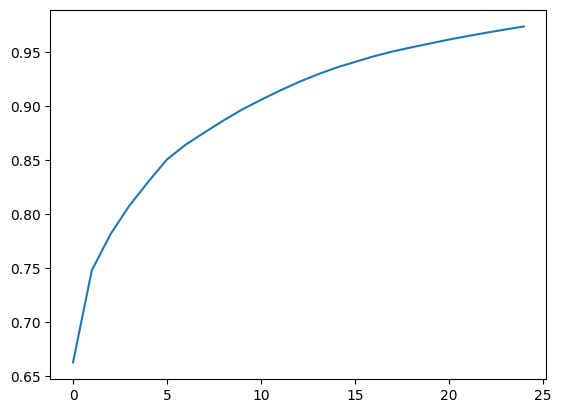

In [68]:
exp_var_pca = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
plt.plot(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, label='Cumulative explained variance')

<p><b style='font-weight=bold; color=darkblue; text-align:justified'>After plot PCA variance explaination, from previous survey, optimal option is remaining only 5 components from selected features preserve the 85% of the data's variance.

## Apply PCA for 3 samples

In [69]:
pca_rs = PCA(n_components=5)
X_train_pca_res = pca_rs.fit_transform(X_res)
X_test_pca_res = pca_rs.transform(X_test)
pca_us = PCA(n_components=5)
X_train_pca_us = pca_us.fit_transform(X_us)
X_test_pca_us = pca_us.transform(X_test)
pca_os = PCA(n_components=5)
X_train_pca_os = pca_os.fit_transform(X_os)
X_test_pca_os = pca_os.transform(X_test)


In [70]:
X_train_pca.shape

(8222, 25)

# TRUE LABEL FOR MODEL EVALUATION

<p><b style='font-weight=bold; color=darkblue; text-align:justified'>To correctly evaluate models' performance, ticdata from kernal package of R was downloaded, compared with trainset and testset and true_label is the target (caravan) column with the last 4000 records from Ticdata.

In [71]:
ticdata = pd.read_csv('data/ticdata.csv')
ticdata_test_label = ticdata.iloc[5822:,-1]
true_label = ticdata_test_label.apply(lambda x: 1 if x=='insurance' else 0)

# MODELS TUNING WITH DIFFERENT RESAMLE TECHNIQUE

# 1. LinearDiscriminantAnalysis

### WITH SMOTE

In [72]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier

0.6655622086005727
----------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.65      0.78      1363
           1       0.12      0.68      0.20        93

    accuracy                           0.66      1456
   macro avg       0.54      0.67      0.49      1456
weighted avg       0.91      0.66      0.74      1456



C:\Users\Admin\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


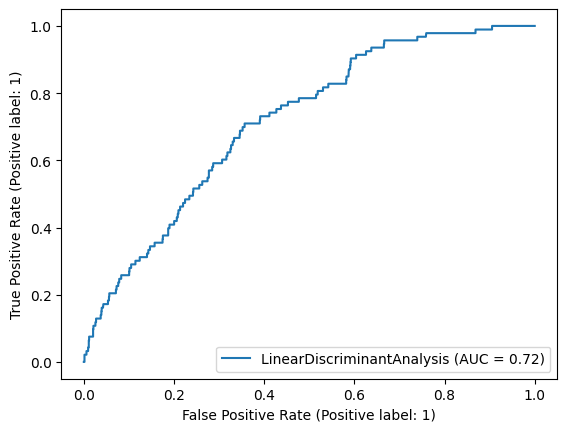

In [73]:

lda_res = LinearDiscriminantAnalysis()
lda_res.fit(X_train_pca_res, y_res)
y_pred = lda_res.predict(X_test_pca_res)

print(roc_auc_score(y_test, y_pred))
print('--'*20)

print(classification_report(y_test, y_pred))
plot_roc_curve(lda_res, X_test_pca_res, y_test)

summary = pd.DataFrame({'SMOTE':[accuracy_score(y_test, y_pred),precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred)]}, index=['accuracy', 'precision', 'recall', 'f1_score', 'AUC'])

In [74]:
from sklearn.metrics import confusion_matrix

In [75]:
confusion_matrix(y_test, y_pred)

array([[891, 472],
       [ 30,  63]], dtype=int64)

In [76]:
import numpy as np
g_MEAN = np.sqrt((882/(882+497))*(52/(52+25)))
g_MEAN

0.6572165158338747

## UNDER SAMPLING

0.6369725226611127
----------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.66      0.78      1363
           1       0.11      0.61      0.19        93

    accuracy                           0.66      1456
   macro avg       0.54      0.64      0.48      1456
weighted avg       0.91      0.66      0.75      1456



C:\Users\Admin\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


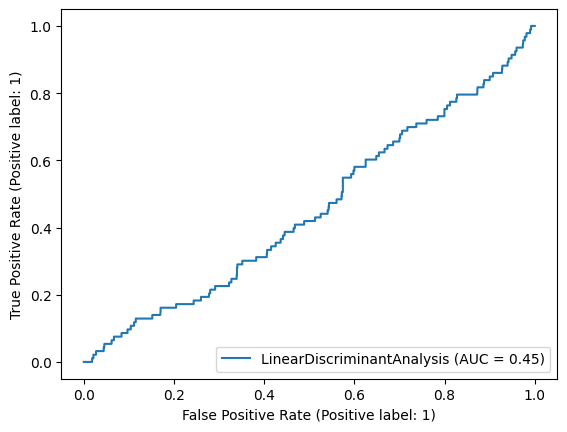

In [77]:

lda_us = LinearDiscriminantAnalysis()
lda_us.fit(X_train_pca_us, y_us)
y_pred = lda_us.predict(X_test_pca_us)

print(roc_auc_score(y_test, y_pred))
print('--'*20)

print(classification_report(y_test, y_pred))
plot_roc_curve(lda_us, X_test_pca_os, y_test)

us_sum = pd.DataFrame({'UnderSampling':[accuracy_score(y_test, y_pred),precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred)]}, index=['accuracy', 'precision', 'recall', 'f1_score', 'AUC'])
summary=pd.concat([summary, us_sum], axis=1)

In [78]:
summary

,SMOTE,UnderSampling
accuracy,0.655220,0.657967
precision,0.117757,0.109827
recall,0.677419,0.612903
f1_score,0.200637,0.186275
AUC,0.665562,0.636973


## OverSampling

0.6540758447131958
----------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.65      0.78      1363
           1       0.11      0.66      0.19        93

    accuracy                           0.65      1456
   macro avg       0.54      0.65      0.49      1456
weighted avg       0.91      0.65      0.74      1456



C:\Users\Admin\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


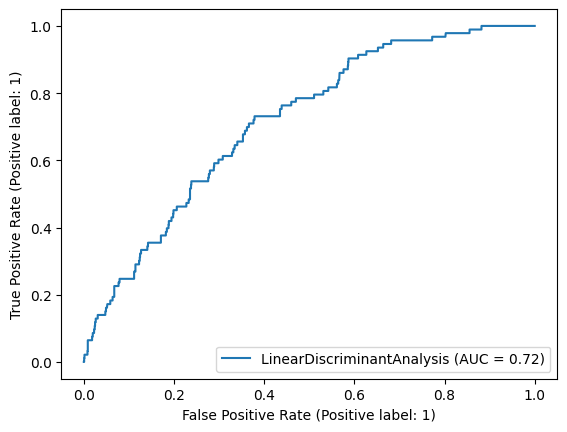

In [79]:

lda_os = LinearDiscriminantAnalysis()
lda_os.fit(X_train_pca_os, y_os)
y_pred = lda_os.predict(X_test_pca_os)

print(roc_auc_score(y_test, y_pred))
print('--'*20)

print(classification_report(y_test, y_pred))
plot_roc_curve(lda_os, X_test_pca_os, y_test)

os_sum = pd.DataFrame({'OverSampling':[accuracy_score(y_test, y_pred),precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred)]}, index=['accuracy', 'precision', 'recall', 'f1_score', 'AUC'])
summary=pd.concat([summary, os_sum], axis=1)

In [80]:
summary

,SMOTE,UnderSampling,OverSampling
accuracy,0.655220,0.657967,0.652473
precision,0.117757,0.109827,0.114019
recall,0.677419,0.612903,0.655914
f1_score,0.200637,0.186275,0.194268
AUC,0.665562,0.636973,0.654076


# 2. RandomForestClassifier

## SMOTE

0.5383325838796457
----------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.90      0.92      1363
           1       0.11      0.17      0.13        93

    accuracy                           0.86      1456
   macro avg       0.53      0.54      0.53      1456
weighted avg       0.89      0.86      0.87      1456



C:\Users\Admin\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


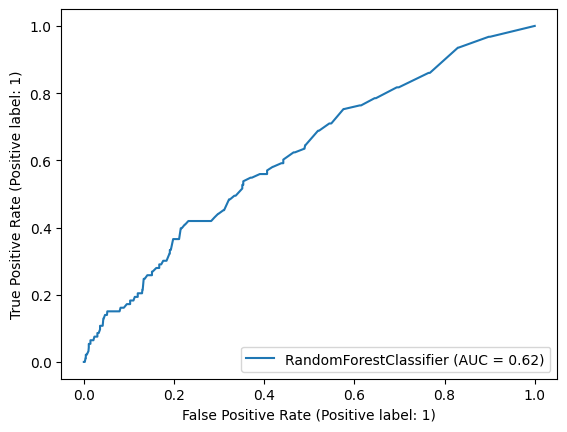

In [81]:

rf_res = RandomForestClassifier()
rf_res.fit(X_train_pca_res, y_res)
y_pred = rf_res.predict(X_test_pca_res)

print(roc_auc_score(y_test, y_pred))
print('--'*20)

print(classification_report(y_test, y_pred))
plot_roc_curve(rf_res, X_test_pca_res, y_test)

summary_rf = pd.DataFrame({'SMOTE':[accuracy_score(y_test, y_pred),precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred)]}, index=['accuracy', 'precision', 'recall', 'f1_score', 'AUC'])

## UnderSampling

0.6380612027548339
----------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.63      0.76      1363
           1       0.11      0.65      0.18        93

    accuracy                           0.63      1456
   macro avg       0.53      0.64      0.47      1456
weighted avg       0.91      0.63      0.73      1456



C:\Users\Admin\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


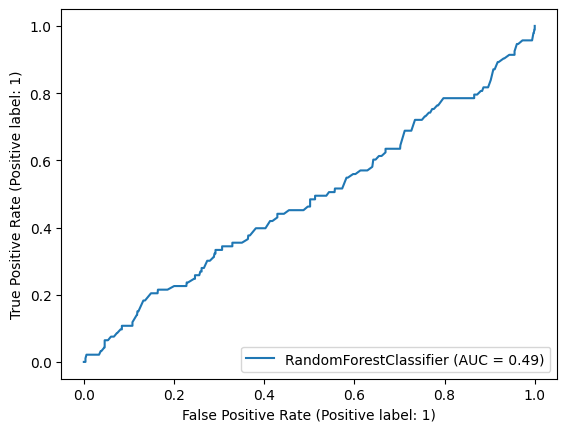

In [82]:

rf_us = RandomForestClassifier()
rf_us.fit(X_train_pca_us, y_us)
y_pred = rf_us.predict(X_test_pca_us)

print(roc_auc_score(y_test, y_pred))
print('--'*20)

print(classification_report(y_test, y_pred))
plot_roc_curve(rf_us, X_test_pca_os, y_test)

rus_sum = pd.DataFrame({'UnderSampling':[accuracy_score(y_test, y_pred),precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred)]}, index=['accuracy', 'precision', 'recall', 'f1_score', 'AUC'])
summary_rf=pd.concat([summary_rf, rus_sum], axis=1)

## OverSampling

0.5370151231865193
----------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1363
           1       0.23      0.10      0.14        93

    accuracy                           0.92      1456
   macro avg       0.58      0.54      0.55      1456
weighted avg       0.89      0.92      0.91      1456



C:\Users\Admin\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


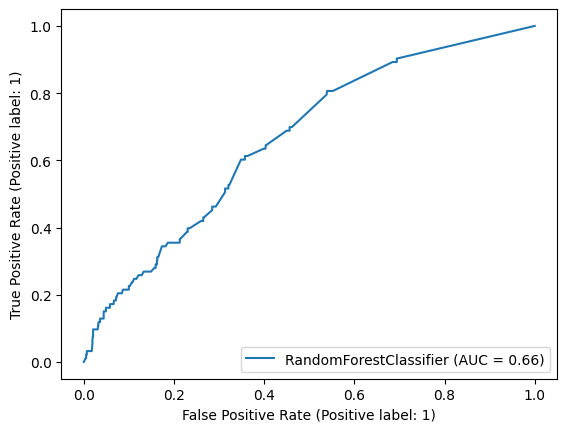

In [83]:

rf_os = RandomForestClassifier()
rf_os.fit(X_train_pca_os, y_os)
y_pred = rf_os.predict(X_test_pca_os)

print(roc_auc_score(y_test, y_pred))
print('--'*20)

print(classification_report(y_test, y_pred))
plot_roc_curve(rf_os, X_test_pca_os, y_test)

ros_sum = pd.DataFrame({'OverSampling':[accuracy_score(y_test, y_pred),precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred)]}, index=['accuracy', 'precision', 'recall', 'f1_score', 'AUC'])
summary_rf=pd.concat([summary_rf, ros_sum], axis=1)

In [84]:
summary_rf

,SMOTE,UnderSampling,OverSampling
accuracy,0.857830,0.631868,0.921016
precision,0.109589,0.106572,0.225000
recall,0.172043,0.645161,0.096774
f1_score,0.133891,0.182927,0.135338
AUC,0.538333,0.638061,0.537015


# 3. LGBMClassifier

## SMOTE

[LightGBM] [Warning] Unknown parameter: max_dept
0.5847356006279634
----------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.83      0.88      1363
           1       0.12      0.34      0.18        93

    accuracy                           0.79      1456
   macro avg       0.53      0.58      0.53      1456
weighted avg       0.90      0.79      0.84      1456



C:\Users\Admin\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


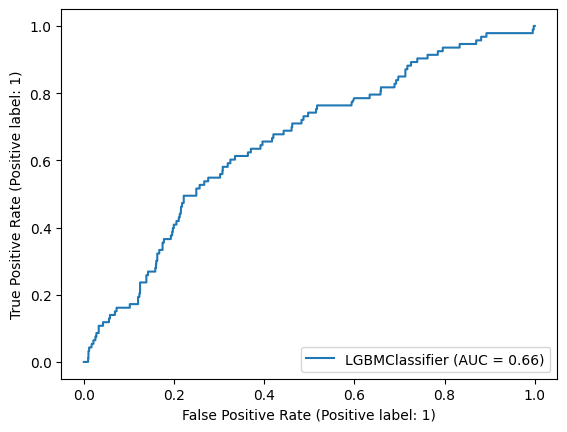

In [85]:
lgm_res = LGBMClassifier(boosting_type='goss', num_leaves=40, max_dept=10, learning_rate=0.1, n_estimators=50)
lgm_res.fit(X_train_pca_res, y_res)
y_pred = lgm_res.predict(X_test_pca_res)

print(roc_auc_score(y_test, y_pred))
print('--'*20)

print(classification_report(y_test, y_pred))
plot_roc_curve(lgm_res, X_test_pca_res, y_test)

summary_lgm = pd.DataFrame({'SMOTE':[accuracy_score(y_test, y_pred),precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred)]}, index=['accuracy', 'precision', 'recall', 'f1_score', 'AUC'])

# OverSampling

In [86]:
lgm_os = LGBMClassifier(boosting_type='goss', num_leaves=40, max_dept=10, learning_rate=0.1, n_estimators=50)
lgm_os.fit(X_train_pca_os, y_os)
y_pred = lgm_os.predict(X_test_pca_os)

print(roc_auc_score(true_label, y_pred))
print('--'*20)

print(classification_report(y_test, y_pred))
plot_roc_curve(lgm_os, X_test_pca_os, y_test)

lgm_os_ = pd.DataFrame({'OverSampling':[accuracy_score(y_test, y_pred),precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred)]}, index=['accuracy', 'precision', 'recall', 'f1_score', 'AUC'])
summary_lgm = pd.concat([summary_lgm, lgm_os_], axis=1)

[LightGBM] [Warning] Unknown parameter: max_dept


ValueError: Found input variables with inconsistent numbers of samples: [4000, 1456]

[LightGBM] [Warning] Unknown parameter: max_dept
0.6265748388674572
----------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.63      0.76      1363
           1       0.10      0.62      0.18        93

    accuracy                           0.63      1456
   macro avg       0.53      0.63      0.47      1456
weighted avg       0.91      0.63      0.72      1456



C:\Users\Admin\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


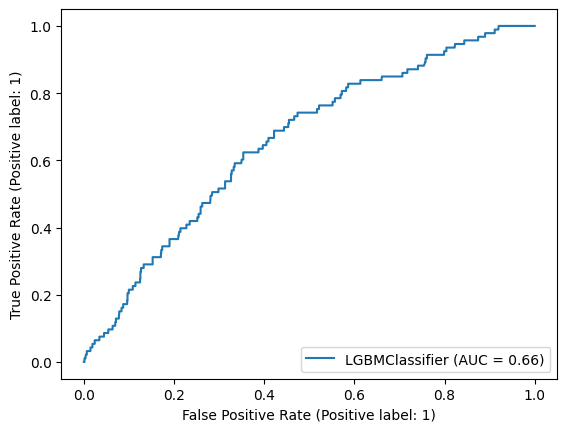

In [87]:
lgm_us = LGBMClassifier(boosting_type='goss', num_leaves=40, max_dept=10, learning_rate=0.1, n_estimators=50)
lgm_us.fit(X_train_pca_us, y_us)
y_pred = lgm_us.predict(X_test_pca_us)

print(roc_auc_score(y_test, y_pred))
print('--'*20)

print(classification_report(y_test, y_pred))
plot_roc_curve(lgm_us, X_test_pca_us, y_test)

lgm_us = pd.DataFrame({'UnderSampling':[accuracy_score(y_test, y_pred),precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred)]}, index=['accuracy', 'precision', 'recall', 'f1_score', 'AUC'])
summary_lgm = pd.concat([summary_lgm, lgm_us], axis=1)

# 4. Logistic Regression

## SMOTE

0.6614126018665341
----------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.67      0.79      1363
           1       0.12      0.66      0.20        93

    accuracy                           0.67      1456
   macro avg       0.54      0.66      0.49      1456
weighted avg       0.91      0.67      0.75      1456



C:\Users\Admin\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


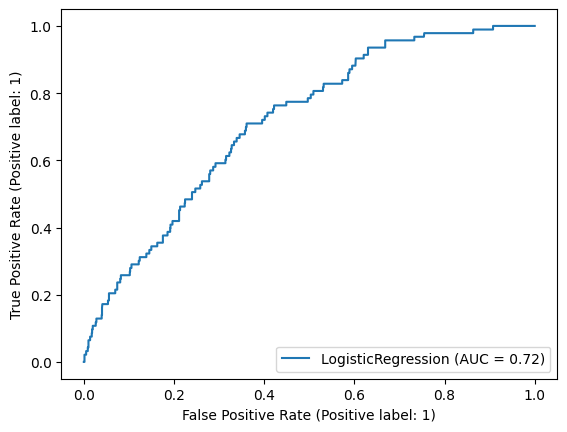

In [88]:

lr_res = LogisticRegression()
lr_res.fit(X_train_pca_res, y_res)
y_pred = lr_res.predict(X_test_pca_res)

print(roc_auc_score(y_test, y_pred))
print('--'*20)

print(classification_report(y_test, y_pred))
plot_roc_curve(lr_res, X_test_pca_res, y_test)

summary_lr = pd.DataFrame({'SMOTE':[accuracy_score(y_test, y_pred),precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred)]}, index=['accuracy', 'precision', 'recall', 'f1_score', 'AUC'])

## UnderSampling

0.6388067119494474
----------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.66      0.79      1363
           1       0.11      0.61      0.19        93

    accuracy                           0.66      1456
   macro avg       0.54      0.64      0.49      1456
weighted avg       0.91      0.66      0.75      1456



C:\Users\Admin\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


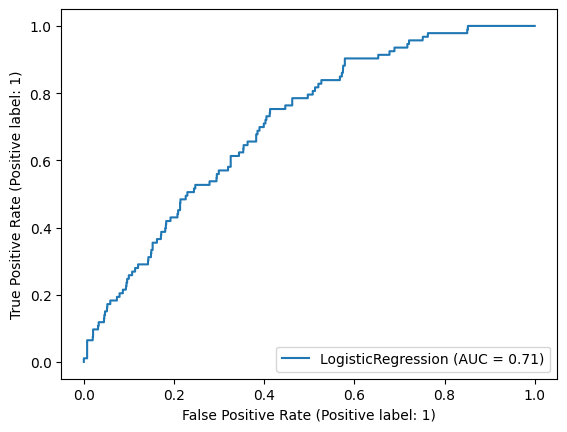

In [89]:

lr_us = LogisticRegression()
lr_us.fit(X_train_pca_us, y_us)
y_pred = lr_us.predict(X_test_pca_us)

print(roc_auc_score(y_test, y_pred))
print('--'*20)

print(classification_report(y_test, y_pred))
plot_roc_curve(lr_us, X_test_pca_us, y_test)

lrus_sum = pd.DataFrame({'UnderSampling':[accuracy_score(y_test, y_pred),precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred)]}, index=['accuracy', 'precision', 'recall', 'f1_score', 'AUC'])
summary_lr = pd.concat([summary_lr, lrus_sum], axis=1)

## OverSampling

0.6595784125781994
----------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.66      0.79      1363
           1       0.12      0.66      0.20        93

    accuracy                           0.66      1456
   macro avg       0.54      0.66      0.49      1456
weighted avg       0.91      0.66      0.75      1456



C:\Users\Admin\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


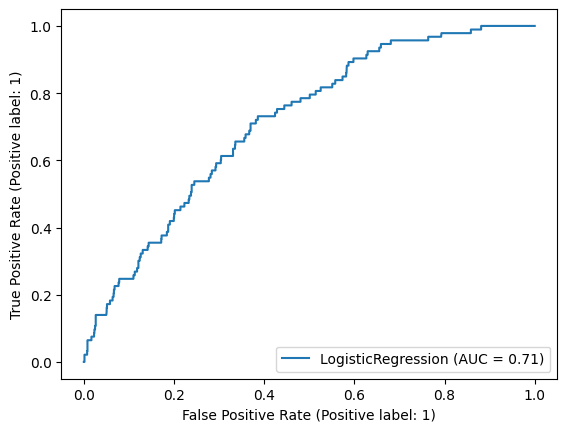

In [90]:

lr_os = LogisticRegression()
lr_os.fit(X_train_pca_os, y_os)
y_pred = lr_os.predict(X_test_pca_os)

print(roc_auc_score(y_test, y_pred))
print('--'*20)

print(classification_report(y_test, y_pred))
plot_roc_curve(lr_os, X_test_pca_os, y_test)

lros_sum = pd.DataFrame({'OverSampling':[accuracy_score(y_test, y_pred),precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred)]}, index=['accuracy', 'precision', 'recall', 'f1_score', 'AUC'])
summary_lr = pd.concat([summary_lr, lros_sum], axis=1)

In [91]:
summary_lr

,SMOTE,UnderSampling,OverSampling
accuracy,0.666209,0.661401,0.662775
precision,0.118447,0.110895,0.117308
recall,0.655914,0.612903,0.655914
f1_score,0.200658,0.187809,0.199021
AUC,0.661413,0.638807,0.659578


In [92]:
summary_total = pd.concat([summary, summary_rf, summary_lr, summary_lgm], axis=1, keys =['LinearDiscriminateAnalysis', 'RandomForestClassifier', 'LogisticRegression', 'LGBMClassifier'])

In [93]:
summary_total.to_csv('Models_summary/resample_technique_tuning.csv')

In [94]:
summary_total

LinearDiscriminateAnalysis                             \
                               SMOTE UnderSampling OverSampling   
accuracy                    0.655220      0.657967     0.652473   
precision                   0.117757      0.109827     0.114019   
recall                      0.677419      0.612903     0.655914   
f1_score                    0.200637      0.186275     0.194268   
AUC                         0.665562      0.636973     0.654076   

          RandomForestClassifier                             \
                           SMOTE UnderSampling OverSampling   
accuracy                0.857830      0.631868     0.921016   
precision               0.109589      0.106572     0.225000   
recall                  0.172043      0.645161     0.096774   
f1_score                0.133891      0.182927     0.135338   
AUC                     0.538333      0.638061     0.537015   

          LogisticRegression                            LGBMClassifier  \
                       SMOTE UnderSampling OverSampling          SMOTE   
accuracy            0.666209      0.661401     0.662775       0.794643   
precision           0.118447      0.110895     0.117308       0.118519   
recall              0.655914      0.612903     0.655914       0.344086   
f1_score            0.200658      0.187809     0.199021       0.176309   
AUC                 0.661413      0.638807     0.659578       0.584736   

                         
          UnderSampling  
accuracy       0.629121  
precision      0.103020  
recall         0.623656  
f1_score       0.176829  
AUC            0.626575

## CONCLUSION 1

From summary dataframe, the best option in this projects is SMOTE with LinearDiscriminateAnalysis algorithm. 

# EVALUTATE ON TESTSET

In [95]:
testset = pd.read_csv('data/test_data.txt', sep=',')

In [96]:
testset

,ID,1,2,3,4,5,6,7,8,9,...,76,77,78,79,80,81,82,83,84,85
0,1,33,1,4,2,8,0,6,0,3,...,0,0,0,0,1,0,0,0,0,0
1,2,6,1,3,2,2,0,5,0,4,...,2,0,0,0,1,0,0,0,0,0
2,3,39,1,3,3,9,1,4,2,3,...,1,0,0,0,1,0,0,0,0,0
3,4,9,1,2,3,3,2,3,2,4,...,0,0,0,0,1,0,0,0,0,0
4,5,31,1,2,4,7,0,2,0,7,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,33,1,2,4,8,0,7,2,0,...,0,0,0,0,1,0,0,0,0,0
3996,3997,24,1,2,3,5,1,5,1,3,...,1,0,0,0,1,0,0,0,0,0
3997,3998,36,1,2,3,8,1,5,1,3,...,0,0,0,0,1,0,0,0,1,0
3998,3999,33,1,3,3,8,1,4,2,3,...,0,0,0,0,0,0,0,0,0,0


In [97]:
test_labels = ticdata.iloc[5822:,1:]

In [98]:
test_labels.CARAVAN.value_counts()/test_labels.shape[0]

noinsurance    0.9405
insurance      0.0595
Name: CARAVAN, dtype: float64

In [99]:
columns = ['ID','Customer Subtype', 'Number of houses', 'Avg size household', 'Avg age', 'Customer main type', 'Roman catholic', 'Protestant', 'Other relition', 'No religion', 'Married', 'Living together', 'Other relation', 'Singles', 'Household without children', 'Household with children', 'High level education', 'Medium level education', 'Lower level education', 'High status', 'Entrepreneur', 'Farmer', 'Middle management', 'Skilled labourers', 'Unskilled labourers', 'Social class A', 'Social class B1', 'Social class B2', 'Social class C', 'Social class D', 'Rented house', 'Home owners', '1 car', '2 cars', 'No car', 'National Health Service', 'Private health insurance', 'Income 30.000', 'Income 30-45.000', 'Income 45-75.000', 'Income 75-122.000', 'Income>123.000', 'Average income', 'Purchasing power class', 'Contribution private third party insurance', 'Contribution third party insurance (firms)', 'Contribution third party insurance (agriculture)', 'Contribution car policies', 'Contribution delivery van policies', 'Contribution motorcycle/scooter policies', 'Contribution lorry policies', 'Contribution trailer policies', 'Contribution tractor polities', 'Contribution agricultural machines policies', 'Contribution moped policies', 'Contribution life insurances',  'Contribution private accident insurance policies', 'Contribution family accidents insurance policies', 'Contribution disability insurance policies', 'Contribution fire policies', 'Contribution surfboard policies', 'Contribution boat policies', 'Contribution bicycle policies', 'Contribution property insurance policies', 'Contribution social security insurance policies', 'Number of private third party insurance', 'Number of third party insurance (firms)', 'Number of third party insurance (agriculture)', 'Number of car policies', 'Number of delivery van policies', 'Number of motorcycle/scooter policies', 'Number of lorry policies', 'Number of trailer policies', 'Number of tractor policies', 'Number of agricultural machines policies', 'Number of moped policies', 'Number of life insurances', 'Number of private accident insurance policies', 'Number of family accidents insurance policies', 'Number of disability insurance policies', 'Number of fire policies','Number of surfboard policies', 'Number of boat policies', 'Number of bicycle policies', 'Number of property insurance policies', 'Number of social security insurance policies']

In [100]:
testset.columns=columns
testset.shape
test_labels

,STYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
5822,Lower class large families,1,4,30-40,Family with grown ups,0%,63 - 75%,0%,24 - 36%,50 - 62%,...,0,0,0,1,0,0,0,0,0,noinsurance
5823,Career and childcare,1,3,30-40,Driven Growers,0%,50 - 62%,0%,37 - 49%,50 - 62%,...,0,0,0,1,0,0,0,0,0,insurance
5824,Large religous families,1,3,40-50,Conservative families,1 - 10%,37 - 49%,11 - 23%,24 - 36%,50 - 62%,...,0,0,0,1,0,0,0,0,0,noinsurance
5825,"Modern, complete families",1,2,40-50,Average Family,11 - 23%,24 - 36%,11 - 23%,37 - 49%,50 - 62%,...,0,0,0,1,0,0,0,0,0,noinsurance
5826,Low income catholics,1,2,50-60,Retired and Religeous,0%,11 - 23%,0%,76 - 88%,100%,...,0,0,0,1,0,0,0,0,0,noinsurance
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9817,Lower class large families,1,2,50-60,Family with grown ups,0%,76 - 88%,11 - 23%,0%,50 - 62%,...,0,0,0,1,0,0,0,0,0,noinsurance
9818,"Young, low educated",1,2,40-50,Living well,1 - 10%,50 - 62%,1 - 10%,24 - 36%,37 - 49%,...,0,0,0,1,0,0,0,0,0,insurance
9819,Couples with teens 'Married with children',1,2,40-50,Family with grown ups,1 - 10%,50 - 62%,1 - 10%,24 - 36%,76 - 88%,...,0,0,0,1,0,0,0,1,0,noinsurance
9820,Lower class large families,1,3,40-50,Family with grown ups,1 - 10%,37 - 49%,11 - 23%,24 - 36%,76 - 88%,...,0,0,0,0,0,0,0,0,0,noinsurance


In [101]:
# pca_5 = PCA(n_components=5)
# X_train_pca_5 = pca.fit_transform(X_res)
X_test_pca_5 = pca_rs.transform(testset.iloc[:,1:])
X_test_raw = testset[selected_feat]
y_test = test_labels

In [112]:
print(f'Total {true_label.sum()} records labeled 1 (representative for buyers)')

Total 238 records labeled 1 (representative for buyers)


## 1. LinearDiscriminantAnalysis APPLY SMOTE TECHNIQUE without PCA

In [210]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_res[selected_feat], y_res)
y_pred = lda.predict(X_test_raw)
y_proba0= lda.predict_proba(X_test_raw)
results = pd.DataFrame({'Target':y_pred, "Probability":y_proba0[:,1]})
results['true_label'] = true_label.values
results.sort_values(by=['Target', 'Probability'], ascending=[False, False], inplace=True)
results.to_csv('Model_1_LinearDiscriminantAnalysis_wt_PCA_all.csv')
results.head(800).to_csv('Model_1_LinearDiscriminantAnalysis_wt_PCA_first_800.csv')

In [211]:
roc_auc_score(true_label, y_pred, average='micro')

0.51856468265137

<AxesSubplot:>

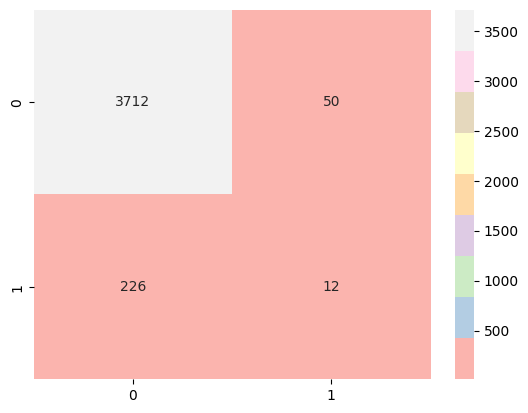

In [212]:
sns.heatmap(confusion_matrix(true_label, y_pred), cmap='Pastel1', annot=True, fmt='.0f',)

In [215]:
print(f'Without PCA only {confusion_matrix(true_label, y_pred)[1,1] } cases, account for {np.round(confusion_matrix(true_label, y_pred)[1,1]/true_label.sum()*100,2)}% of positive casess were correctly predicted from testset')

Without PCA only 12 cases, account for 5.04% of positive casess were correctly predicted from testset


In [216]:
fpr0, tpr0, _0 = roc_curve(true_label, y_proba0[:,1])

C:\Users\Admin\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


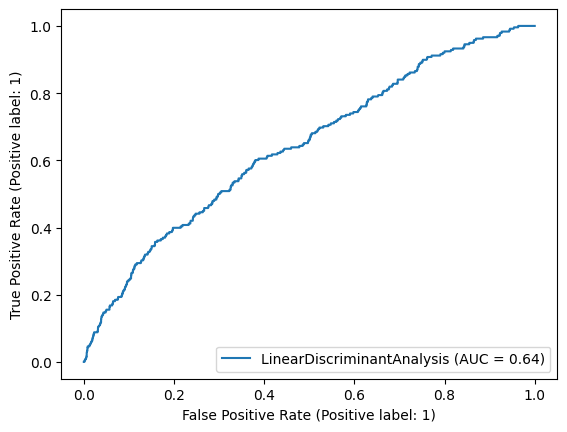

In [217]:
plot_roc_curve(lda,X_test_raw, true_label)

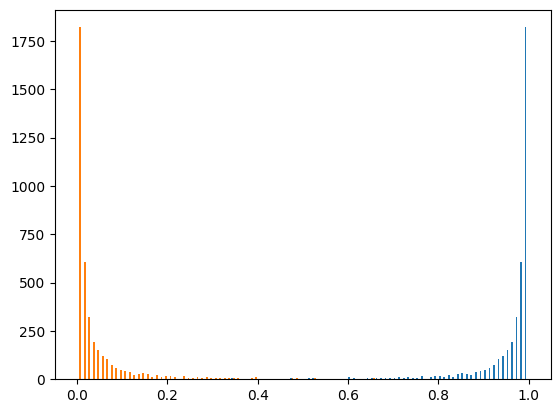

In [218]:
plt.hist(y_proba0, bins=100)
plt.show()

In [219]:
# fpr1, tpr1, _1 = roc_curve(true_label, y_proba[:,1])
precision0, recall0, _0_ = precision_recall_curve(true_label, y_proba0[:,1])

In [220]:
F_2_score=(((1+2**2)*(precision_score(true_label, y_pred)*recall_score(true_label, y_pred)))/(2**2*(precision_score(true_label, y_pred)+recall_score(true_label, y_pred))))
F_2_score

0.05000000000000001

## 2. LinearDiscriminantAnalysis APPLY SMOTE TECHNIQUE + PCA FOR COVARIATE PROBLEM

In [221]:
pca = PCA(n_components=5)
X_train_5 = pca.fit_transform(X_res)
X_test_5 = pca.transform(testset.iloc[:,1:])

In [222]:
# pca = PCA(n_components=10)
# X_train_10 = pca.fit_transform(X_res)
# X_test_10 = pca.transform(testset.iloc[:,1:])
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_5, y_res)
y_pred = lda.predict(X_test_5)
y_proba1 = lda.predict_proba(X_test_5)
results = pd.DataFrame({'Target':y_pred, "Probability":y_proba1[:,1]})
results['true_label'] = true_label.values
# results['true_label'] = results['true_label'].apply(lambda x: 1 if x=='insurance' else 0)
results.sort_values(by=['Target', 'Probability'], ascending=[False, False], inplace=True)
results.to_csv('Model_2_LinearDiscriminantAnalysis_w_PCA_all.csv')
results.head(800).to_csv('Model_2_LinearDiscriminantAnalysis_w_PCA_first_800.csv')

In [223]:
roc_auc_score(true_label, y_pred, average='micro')

0.6363390651316347

In [224]:
true_label

5822    0
5823    1
5824    0
5825    0
5826    0
       ..
9817    0
9818    1
9819    0
9820    0
9821    0
Name: CARAVAN, Length: 4000, dtype: int64

In [225]:
print(classification_report(true_label, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.64      0.77      3762
           1       0.10      0.63      0.17       238

    accuracy                           0.64      4000
   macro avg       0.53      0.64      0.47      4000
weighted avg       0.91      0.64      0.73      4000



<AxesSubplot:>

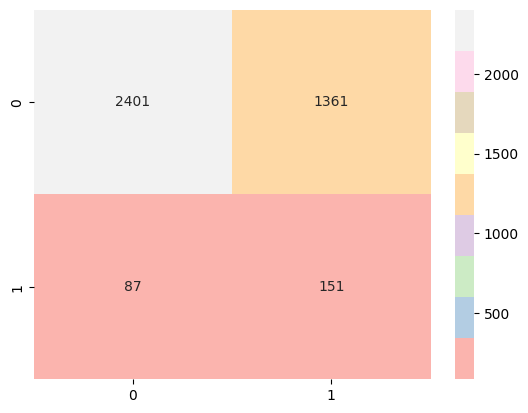

In [226]:
sns.heatmap(confusion_matrix(true_label, y_pred), cmap='Pastel1', annot=True, fmt='.0f',)

In [227]:
print(f'With PCA apply after SMOTE {confusion_matrix(true_label, y_pred)[1,1] } cases, account for {np.round(confusion_matrix(true_label, y_pred)[1,1]/true_label.sum()*100,2)}% of positive cases, were correctly predicted from testset')

With PCA apply after SMOTE 151 cases, account for 63.45% of positive cases, were correctly predicted from testset


In [228]:
fpr1, tpr1, _1 = roc_curve(true_label, y_proba1[:,1])

C:\Users\Admin\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


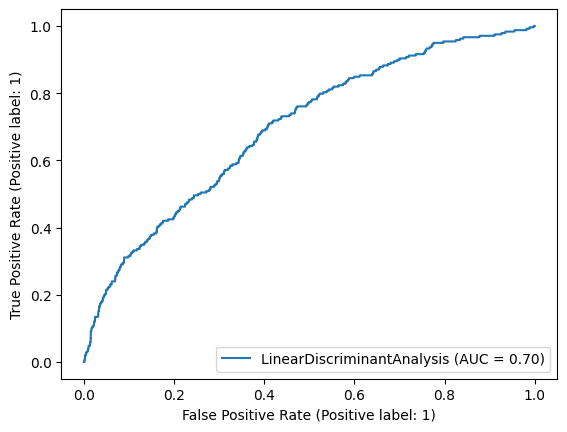

In [229]:
plot_roc_curve(lda,X_test_5, true_label)

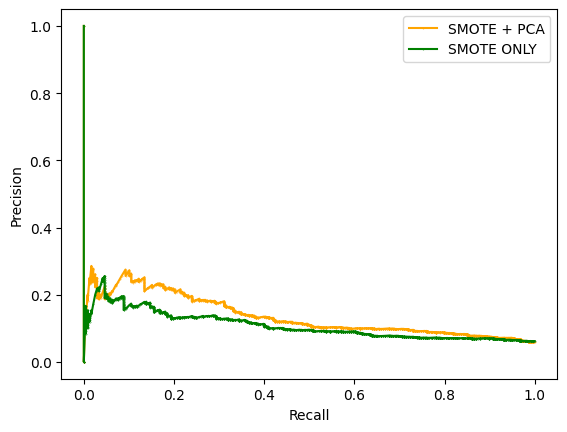

In [230]:
precision, recall, _ = precision_recall_curve(true_label, y_proba[:,1])
plt.plot(recall, precision, marker='.', label='SMOTE + PCA', markersize=0.5, color='orange')
plt.plot(recall0, precision0, marker='.', label='SMOTE ONLY', markersize=0.5, color='g')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()

In [232]:
F_2_score=(((1+2**2)*(precision_score(true_label, y_pred)*recall_score(true_label, y_pred)))/(2**2*(precision_score(true_label, y_pred)+recall_score(true_label, y_pred))))

In [233]:
F_2_score

0.10785714285714286

In [234]:
print(f'F_2 score was 0.108, {F_2_score/0.04} higher than without apply PCA')

F_2 score was 0.108, 2.6964285714285716 higher than without apply PCA


In [235]:
from sklearn.metrics import log_loss
probabilities = [[len(true_label[true_label==0])/len(true_label), len(true_label[true_label==1])/len(true_label)] for _ in range(len(true_label))]
avg_logloss = log_loss(true_label, probabilities)
print('Baseline: Log Loss=%.3f' % (avg_logloss))
avg_logloss = log_loss(true_label, true_label)
print('Perfect: Log Loss=%.3f' % (avg_logloss))

Baseline: Log Loss=0.226
Perfect: Log Loss=0.000


In [236]:
probabilities = [[1, 0] for _ in range(len(true_label))]
avg_logloss = log_loss(true_label, probabilities)
print('P(class0=1): Log Loss=%.3f' % (avg_logloss))

probabilities = [[ 0,1] for _ in range(len(true_label))]
avg_logloss = log_loss(true_label, probabilities)
print('P(class1=1): Log Loss=%.3f' % (avg_logloss))


P(class0=1): Log Loss=2.055
P(class1=1): Log Loss=32.484


## 3. FIXED CROSS-VALIDATION TECHNIQUE

### Cross-validation using LinearDiscriminantAnalysis

In [246]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_predict


model = LinearDiscriminantAnalysis()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X_train_5, y_res, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % np.mean(scores))

Mean ROC AUC: 0.744


In [247]:
scores

array([0.76273238, 0.7719923 , 0.77343551, 0.75350608, 0.72391828,
       0.70171855, 0.7240722 , 0.73730028, 0.73514542, 0.75228361,
       0.73956193, 0.74347731, 0.753068  , 0.73520166, 0.75048691,
       0.75085987, 0.74068943, 0.72529466, 0.74882341, 0.74919045,
       0.76122647, 0.7434153 , 0.73606301, 0.75932833, 0.73584397,
       0.74219606, 0.73857602, 0.75187514, 0.73179474, 0.73507142])

In [251]:
# y_pred=model.fit(X_train_5, y_res).predict(X_test_5)

In [250]:
# confusion_matrix(true_label, y_pred)

### Cross-validation using LogisticRegression

In [252]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_predict


model = LogisticRegression(solver='lbfgs', class_weight='balanced')
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X_train_5, y_res, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % np.mean(scores))

Mean ROC AUC: 0.743


In [253]:
model = LogisticRegression(solver='lbfgs', class_weight={0:0.94, 1:0.06})
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X_train_5, y_res, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % np.mean(scores))

Mean ROC AUC: 0.743


In [254]:
scores

array([0.76139182, 0.7713545 , 0.77459582, 0.75120323, 0.72087544,
       0.69998402, 0.72497795, 0.73682076, 0.73500334, 0.74973804,
       0.73899499, 0.74376668, 0.75109667, 0.73548582, 0.74738487,
       0.74976468, 0.73915617, 0.72466715, 0.74707112, 0.74929701,
       0.76064772, 0.74260034, 0.73550654, 0.75714979, 0.73468959,
       0.74100023, 0.73814979, 0.75047803, 0.73049236, 0.73570486])

In [255]:
balance = [{0:100,1:1}, {0:10,1:1}, {0:1,1:1}, {0:1,1:10}, {0:1,1:100}]
param_grid = dict(class_weight=balance)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv,
scoring='roc_auc')
grid_result = grid.fit(X_train_5, y_res)
print('Best: %f using %s' % (grid_result.best_score_, grid_result.best_params_))


means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('%f (%f) with: %r' % (mean, stdev, param))

Best: 0.743371 using {'class_weight': {0: 1, 1: 1}}
0.742396 (0.014801) with: {'class_weight': {0: 100, 1: 1}}
0.742765 (0.014777) with: {'class_weight': {0: 10, 1: 1}}
0.743371 (0.014688) with: {'class_weight': {0: 1, 1: 1}}
0.742224 (0.014417) with: {'class_weight': {0: 1, 1: 10}}
0.740506 (0.014348) with: {'class_weight': {0: 1, 1: 100}}


In [262]:
# pca = PCA(n_components=10)
# X_train_10 = pca.fit_transform(X_res)
# X_test_10 = pca.transform(testset.iloc[:,1:])
model = LogisticRegression(solver='lbfgs', class_weight={0:1, 1:1})
model.fit(X_train_5, y_res)
y_pred = model.predict(X_test_5)
y_proba2 = model.predict_proba(X_test_5)
results = pd.DataFrame({'Target':y_pred, "Probability":y_proba2[:,1]})
results['true_label'] = true_label.values
# results['true_label'] = results['true_label'].apply(lambda x: 1 if x=='insurance' else 0)
results.sort_values(by=['Target', 'Probability'], ascending=[False, False], inplace=True)
# results.to_csv('Model_2_LinearDiscriminantAnalysis_w_PCA_all.csv')
# results.head(800).to_csv('Model_2_LinearDiscriminantAnalysis_w_PCA_first_800.csv')

In [263]:
confusion_matrix(true_label, y_pred)

array([[2443, 1319],
       [  92,  146]], dtype=int64)

In [264]:
roc_auc_score(true_label, y_pred, average='micro')

0.631417000612047

In [265]:
print(classification_report(true_label, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.65      0.78      3762
           1       0.10      0.61      0.17       238

    accuracy                           0.65      4000
   macro avg       0.53      0.63      0.47      4000
weighted avg       0.91      0.65      0.74      4000



In [266]:
print(f'With PCA apply after SMOTE combined CROSS-VALIDATION with LR and LDA {confusion_matrix(true_label, y_pred)[1,1] } cases, account for {np.round(confusion_matrix(true_label, y_pred)[1,1]/true_label.sum()*100,2)}% of positive cases, were correctly predicted from testset')

With PCA apply after SMOTE combined CROSS-VALIDATION with LR and LDA 146 cases, account for 61.34% of positive cases, were correctly predicted from testset


In [267]:
fpr2, tpr2, _2 = roc_curve(true_label, y_proba2[:,1])

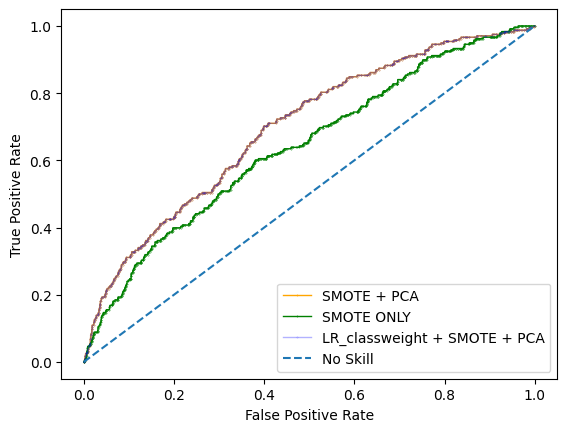

In [268]:
# fpr1, tpr1, _1 = roc_curve(true_label, y_proba1[:,1])
plt.plot(fpr1, tpr1, marker='.', label='SMOTE + PCA', linewidth=1, color='orange', markersize=0.5)
plt.plot(fpr0, tpr0, marker='.', label='SMOTE ONLY', linewidth=1, color='green', markersize=0.5)
plt.plot(fpr2, tpr2, marker='.', label='LR_classweight + SMOTE + PCA', linewidth=1, color='b', markersize=0.5, alpha=0.3)
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

## MOVING THRESHOLD

In [282]:
import warnings
warnings.filterwarnings("ignore")

model = LogisticRegression(solver='lbfgs', class_weight={0:1, 1:1})
model.fit(X_train_5, y_res)
y_pred_ = model.predict(X_test_5)
probs = model.predict_proba(X_test_5)
pos_probs = probs[:,1]

thresholds = np.arange(0,100,0.05)

def labels(pos_prob, threshold):
    return (pos_prob>threshold).astype('int')

f1_scores = [f1_score(true_label, labels(pos_probs, threshold)) for threshold in thresholds]
recall_scores = [recall_score(true_label, labels(pos_probs, threshold)) for threshold in thresholds]
precision_scores =[precision_score(true_label, labels(pos_probs, threshold)) for threshold in thresholds]
accuracy_scores  = [accuracy_score(true_label, labels(pos_probs, threshold)) for threshold in thresholds]
TPs = [confusion_matrix(true_label, labels(pos_probs, threshold))[1,1] for threshold in thresholds]
FNs = [confusion_matrix(true_label, labels(pos_probs, threshold))[1,0] for threshold in thresholds]
FPs = [confusion_matrix(true_label, labels(pos_probs, threshold))[0,1] for threshold in thresholds]
# FNs = [confusion_matrix(true_label, labels(pos_probs, threshold))[1,0] for threshold in thresholds]





In [283]:
theshold_moving_results = pd.DataFrame({'Threshold': thresholds,
                                       'f1_score': f1_scores,
                                       'recall_score':recall_scores,
                                       'precision_scores':precision_scores,
                                       'accuracy_scores':accuracy_scores,
                                       'True Positive':TPs,
                                       'False Negative': FNs,
                                       'False Positive': FPs})
theshold_moving_results.to_csv('Models_summary/theshold_moving_results.csv')

In [ ]:
# theshold_moving_results[theshold_moving_results['True Positive']==theshold_moving_results['True Positive'].max()]

In [272]:
y_pred = labels(pos_probs, 0.4)
print(confusion_matrix(true_label, y_pred))
fpr_04 = confusion_matrix(true_label, y_pred)[0,1]
tpr_04 = confusion_matrix(true_label, y_pred)[1,1]

[[1925 1837]
 [  54  184]]


In [274]:
y_pred = labels(pos_probs, 0.35)
print(confusion_matrix(true_label, y_pred))
fpr_035 = confusion_matrix(true_label, y_pred)[0,1]
tpr_035 = confusion_matrix(true_label, y_pred)[1,1]

[[1648 2114]
 [  43  195]]


In [275]:
y_pred = labels(pos_probs, 0.3)
print(confusion_matrix(true_label, y_pred))
fpr_03 = confusion_matrix(true_label, y_pred)[0,1]
tpr_03 = confusion_matrix(true_label, y_pred)[1,1]

[[1384 2378]
 [  34  204]]


In [276]:
y_pred = labels(pos_probs, 0.25)
print(confusion_matrix(true_label, y_pred))
fpr_025 = confusion_matrix(true_label, y_pred)[0,1]
tpr_025 = confusion_matrix(true_label, y_pred)[1,1]

[[1037 2725]
 [  21  217]]


In [277]:
y_pred = labels(pos_probs, 0.2)
print(confusion_matrix(true_label, y_pred))
fpr_02 = confusion_matrix(true_label, y_pred)[0,1]
tpr_02 = confusion_matrix(true_label, y_pred)[1,1]

[[ 647 3115]
 [  10  228]]


In [284]:
theshold_moving_results.head(20)

,Threshold,f1_score,recall_score,precision_scores,accuracy_scores,True Positive,False Negative,False Positive
0,0.00,0.112317,1.000000,0.059500,0.05950,238,0,3762
1,0.05,0.112423,1.000000,0.059560,0.06050,238,0,3758
2,0.10,0.112595,0.991597,0.059686,0.07000,236,2,3718
3,0.15,0.117706,0.978992,0.062618,0.12675,233,5,3488
4,0.20,0.127339,0.957983,0.068202,0.21875,228,10,3115
5,0.25,0.136478,0.911765,0.073759,0.31350,217,21,2725
6,0.30,0.144681,0.857143,0.079009,0.39700,204,34,2378
7,0.35,0.153121,0.819328,0.084452,0.46075,195,43,2114
8,0.40,0.162904,0.773109,0.091044,0.52725,184,54,1837
9,0.45,0.170277,0.710084,0.096737,0.58825,169,69,1578


# Conclusion

- LinearDiscriminant after SMOTE and PCA are the simplest and opimal model for prediction with highest recall_score - 0.69 and 155 true positive cases out of total 238 true positive cases.
- Logistic Regression model for Threshold tuning give better result with list of all possiple cases for us choosing the most suitable threshold depend on our loss cost calculation from false positive cases and false negative cases predicted.